Decision Tree Results:


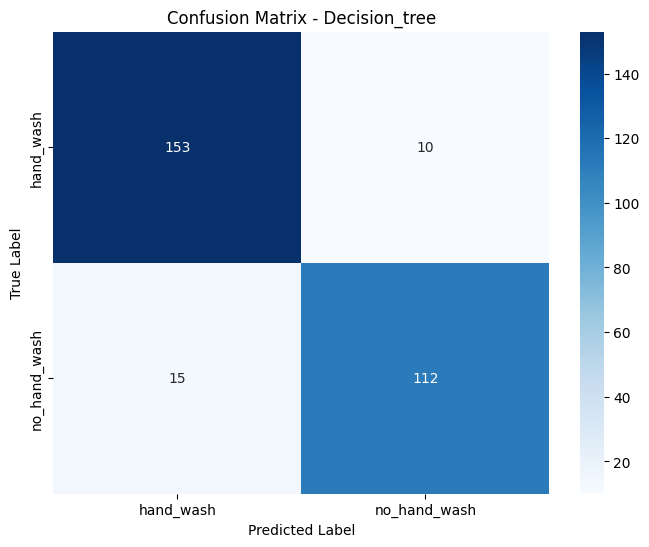


Accuracy (Decision_tree):
 0.9137931034482759

Random Forest Results:


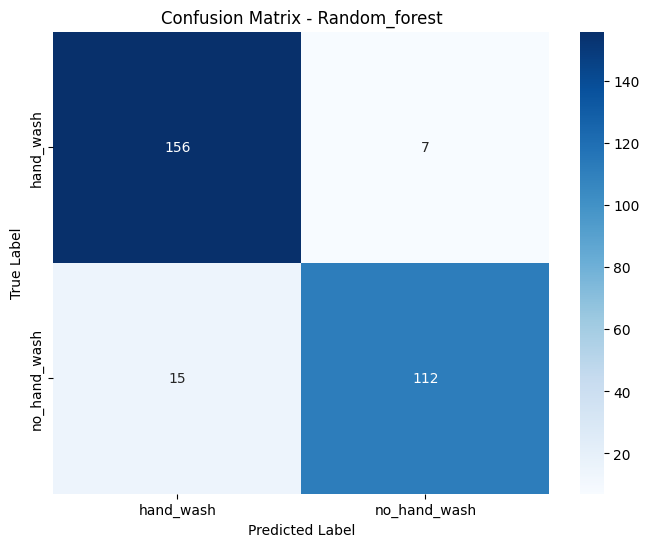


Accuracy (Random_forest):
 0.9241379310344827

SVM Results:


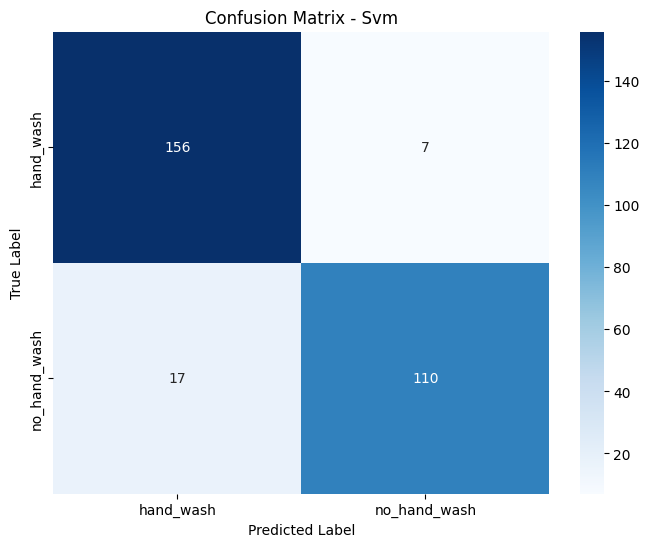


Accuracy (Svm):
 0.9172413793103448


0.9172413793103448

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

def classify_activity(features_path, features_list, classification_method):
    # Load data
    data = pd.read_csv(features_path)
    X = data[features_list]
    y = data['Activity']
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Select classifier based on the specified method
    if classification_method == 'decision_tree':
        classifier = DecisionTreeClassifier(random_state=42)
    elif classification_method == 'random_forest':
        classifier = RandomForestClassifier(random_state=42)
    elif classification_method == 'svm':
        classifier = SVC(random_state=42)
    else:
        raise ValueError("Invalid classification method")
    
    # Train the classifier and predict
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    # Evaluate the model
    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Display confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
                xticklabels=classifier.classes_, yticklabels=classifier.classes_)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {classification_method.capitalize()}")
    plt.show()
    
    print(f"\nAccuracy ({classification_method.capitalize()}):\n", accuracy)
    
    return accuracy

# Example usage:
print("Decision Tree Results:")
classify_activity('features.csv', ['mean_x', 'std_x', 'mean_y', 'std_y', 'mean_z', 'std_z'], 'decision_tree')

print("\nRandom Forest Results:")
classify_activity('features.csv', ['mean_x', 'std_x', 'mean_y', 'std_y', 'mean_z', 'std_z'], 'random_forest')

print("\nSVM Results:")
classify_activity('features.csv', ['mean_x', 'std_x', 'mean_y', 'std_y', 'mean_z', 'std_z'], 'svm')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import accuracy_score

def classify_with_sfs(features_path, features_list, time_interval):
    # Load data
    data = pd.read_csv(features_path)
    X = data[features_list]
    y = data['Activity']
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize classifier (Decision Tree in this case)
    classifier = DecisionTreeClassifier(random_state=42)
    
    # Sequential Feature Selector to find the best feature subset
    sfs = SequentialFeatureSelector(classifier, n_features_to_select="auto", direction="forward", scoring="accuracy", cv=5)
    sfs.fit(X_train, y_train)
    
    # Get the best feature subset
    best_features = list(X_train.columns[sfs.get_support()])
    print("Best feature subset:", best_features)
    
    # Train the classifier on the selected features
    classifier.fit(X_train[best_features], y_train)
    y_pred = classifier.predict(X_test[best_features])
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAccuracy with best feature subset:", accuracy)
    
    return best_features, accuracy

# Example usage with the best time interval and initial feature set
best_features, accuracy = classify_with_sfs('features.csv', 
                                            ['mean_x', 'std_x', 'mean_y', 'std_y', 'mean_z', 'std_z', 'median_x', 'median_y', 'median_z', 'rms_x', 'rms_y', 'rms_z'], 
                                            time_interval=3)
